In [1]:
%matplotlib inline
from __future__ import division

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
energy = pd.read_csv('../../data/recs2009_public.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
energy.head(5)

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [7]:
energy.shape

(12083, 940)

In [8]:
energy.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


In [9]:
energy_sample = energy.sample(1000)

Let's plot response variables

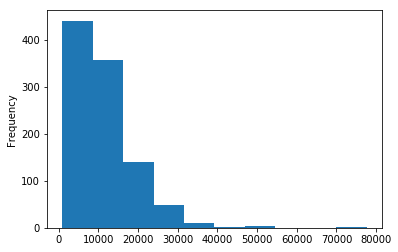

In [10]:
energy_sample.KWH.plot.hist() # Total Site Electricity usage, in kilowatt-hours, 2009

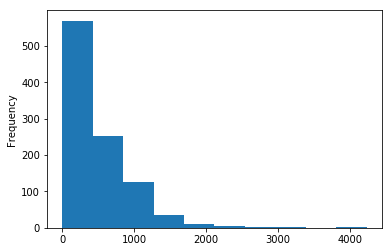

In [14]:
energy_sample.CUFEETNG.plot.hist() # Total Natural Gas usage, in hundred cubic feet, 2009

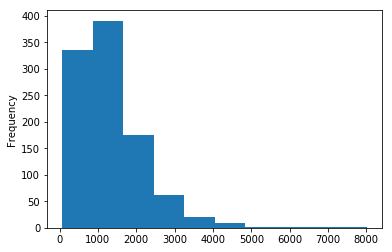

In [13]:
energy_sample.DOLLAREL.plot.hist() # Total Electricity cost, in whole dollars, 2009

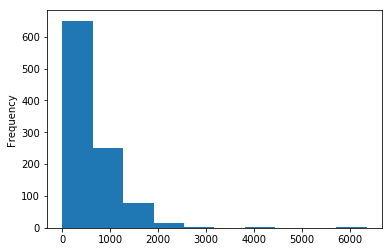

In [12]:
energy_sample.DOLLARNG.plot.hist() # Total Natural Gas cost, in whole dollars, 2009

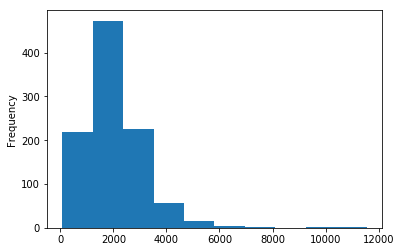

In [19]:
energy_sample.TOTALDOL.plot.hist() # Total cost, in whole dollars, 2009 

Log transform response

In [22]:
energy_sample['KWH_log'] = np.log(1 + energy_sample.KWH)
energy_sample['CUFEETNG_log'] = np.log(1 + energy_sample.CUFEETNG)
energy_sample['DOLLAREL_log'] = np.log(1 + energy_sample.DOLLAREL)
energy_sample['DOLLARNG_log'] = np.log(1 + energy_sample.DOLLARNG)
energy_sample['TOTALDOL_log'] = np.log(1 + energy_sample.TOTALDOL)

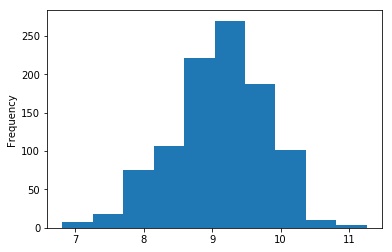

In [23]:
energy_sample.KWH_log.plot.hist() # Total Site Electricity usage, in kilowatt-hours, 2009, log transformed

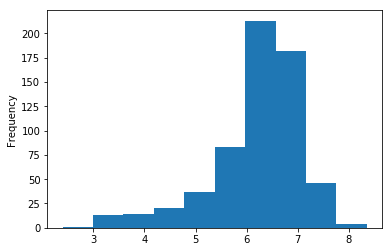

In [25]:
energy_sample[energy_sample.CUFEETNG_log > 0].CUFEETNG_log.plot.hist() # Total Natural Gas usage, in hundred cubic feet, 2009, log transformed

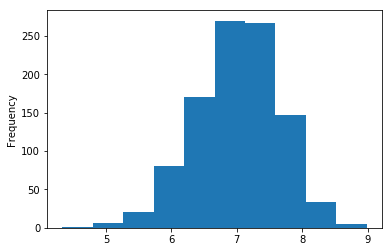

In [26]:
energy_sample.DOLLAREL_log.plot.hist() # Total Electricity cost, in whole dollars, 2009, log-transformed

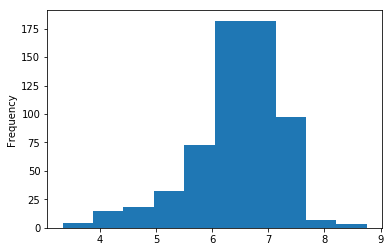

In [28]:
energy_sample[energy_sample.DOLLARNG_log > 0].DOLLARNG_log.plot.hist() # Total Natural Gas cost, in whole dollars, 2009, log-transformed

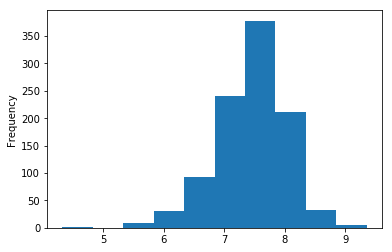

In [30]:
energy_sample[energy_sample.TOTALDOL_log > 0].TOTALDOL_log.plot.hist() # Total cost, in whole dollars, 2009 

I suggest to use Total Electricity cost, in whole dollars, 2009, log-transformed as our response variable

Lets see how Total Electricity cost relates to Total heated square footage

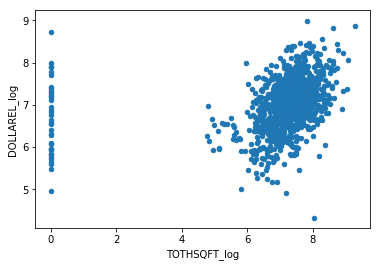

In [32]:
energy_sample['TOTHSQFT_log'] = np.log(1 + energy_sample.TOTHSQFT)
energy_sample.sample(1000).plot.scatter(x='TOTHSQFT_log', y='DOLLAREL_log')

and to Cooling degree days in 2009, base temperature 65F

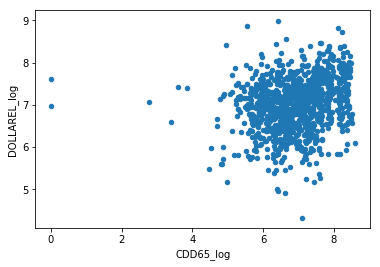

In [33]:
energy_sample['CDD65_log'] = np.log(1 + energy_sample.CDD65)
energy_sample.sample(1000).plot.scatter(x='CDD65_log', y='DOLLAREL_log')

And some qualitative variables...

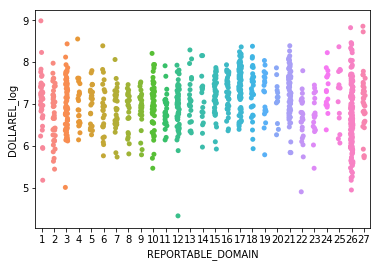

In [36]:
sns.stripplot(data=energy_sample, y = 'DOLLAREL_log', x='REPORTABLE_DOMAIN', jitter=True)

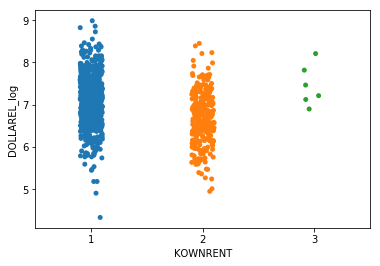

In [37]:
sns.stripplot(data=energy_sample, y = 'DOLLAREL_log', x='KOWNRENT', jitter=True)

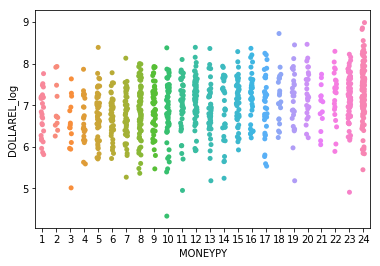

In [38]:
sns.stripplot(data=energy_sample, y = 'DOLLAREL_log', x='MONEYPY', jitter=True)